# Importações

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

# Leitura de base de dados

In [2]:
df = pd.read_csv('../../Datasets/diamonds.csv', sep = ",", low_memory=False)
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# PreProcessamentos

## Remove os ids

In [3]:

df = df.drop(df.columns[0], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Checagem de valores duplicados

In [4]:
df.duplicated().sum()

146

In [5]:
#Checar quantos valores sao duplicados
print("Duplicated values: ", df.duplicated().sum())

Duplicated values:  146


### Ver quais elementos são duplicados

In [6]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


### Remove os valores duplicados, mantendo a primeira ocorrência

In [7]:
df.drop_duplicates(keep='first',inplace=True) 
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Checagem de valores faltantes em cada atributo

In [8]:
print("Missing values: ", df.isnull().sum())

Missing values:  carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


## Aplicando pre processamento adicional (transformação para minúsculo) 

In [9]:
df_processado  = df.copy()
df_processado['cut'] = df['cut'].apply(lambda x: x.lower())
df_processado

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,very good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Se tiver valores faltantes

In [10]:
df_with_NAs = pd.read_csv('../../Datasets/NAs.txt', sep = "\t", low_memory=False)

#remove os ids
df_with_NAs = df_with_NAs.drop(df_with_NAs.columns[0], axis=1)
df_with_NAs.head()

,A,B,C
0,-0.166919,0.979728,-0.632955
1,-0.297953,-0.912674,-1.365463
2,-0.120211,-0.540679,-0.680481
3,NaN,-2.027325,1.533582
4,NaN,NaN,0.461821


In [11]:
print("Missing values: ", df_with_NAs.isnull().sum())

Missing values:  A    2
B    2
C    3
dtype: int64


In [12]:
df_with_NAs.isnull().sum().sum()

7

### Pode preencher estes valores de diferentes formas, com 0's, médias, medianas ou excluí-los

In [13]:
#df_with_NAs.fillna(0) # Substitui os NaN por 0s
#df_with_NAs.fillna(df_with_NAs.mean()) # Substitui os NaN pela média da coluna
df_with_NAs.fillna(df_with_NAs.median()) # Substitui os NaN pela mediana da coluna


#df_with_NAs.dropna(how ='any') # Remove os NaNs

,A,B,C
0,-0.166919,0.979728,-0.632955
1,-0.297953,-0.912674,-1.365463
2,-0.120211,-0.540679,-0.680481
3,-0.232436,-2.027325,1.533582
4,-0.232436,-0.576511,0.461821
5,-0.788073,-0.576511,-0.632955
6,-0.916080,-0.612343,-0.632955
7,-0.887858,1.033826,-0.632955
8,1.948430,1.025011,-2.982224
9,0.019698,-0.795876,-0.046431


## Estatisticas dos valores numericos

### Mostra a estatística das variáveis numéricas

In [14]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Checa a média das variáveis numéricas

In [15]:
df.mean()

carat       0.797780
depth      61.748080
table      57.458109
price    3933.065082
x           5.731214
y           5.734653
z           3.538714
dtype: float64

### Checa a mediana das variáveis numéricas

In [16]:
df.median()

carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64

### Checa a moda das variáveis numéricas

In [17]:
df.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,Ideal,G,SI1,62.0,56.0,605,4.37,4.34,2.7


### Checa a variância das variáveis numéricas

In [18]:
df.var()

carat    2.240983e-01
depth    2.044640e+00
table    4.989322e+00
price    1.590506e+07
x        1.255957e+00
y        1.302358e+00
z        4.970779e-01
dtype: float64

### Checa o desvio padrão das variáveis numéricas

In [19]:
df.std()

carat       0.473390
depth       1.429909
table       2.233679
price    3988.114460
x           1.120695
y           1.141209
z           0.705037
dtype: float64

## Checa a distribuição por tipos de 'cut', 'color' e 'clarity' do diamante

__cut__ - cut quality <br>
__color__ - diamond's color - J (worst) to D (best)) <br>
__clarity__ - measurement of how clear is the diamond - I1 (worst), SI2,SI1,VS2,VS1,VVS2,VVS1,IF(best)

In [20]:
cut = df['cut'].value_counts()
color = df['color'].value_counts()
clarity = df['clarity'].value_counts()
print(cut)
print(color)
print(clarity)

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64


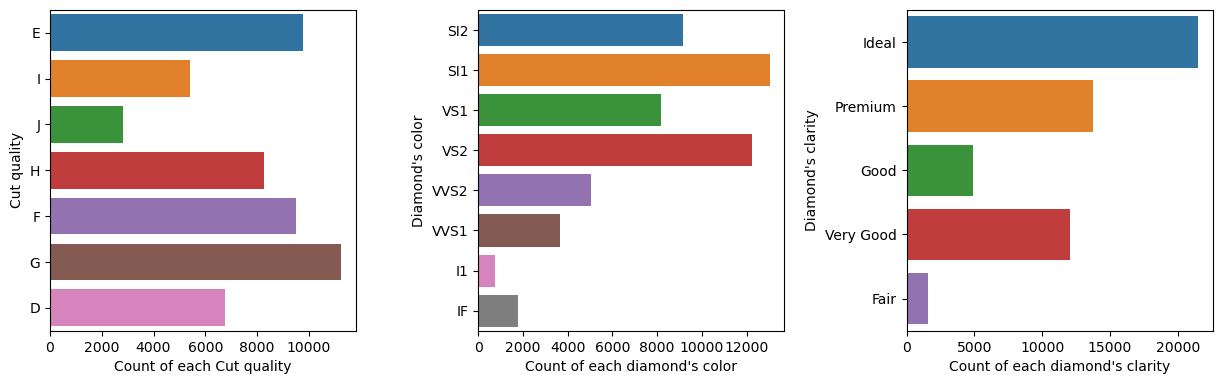

In [21]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plot1 = plt.subplot(2, 3, 1)
sns.countplot(y=df.color ,data=df)
plt.xlabel("Count of each Cut quality")
plt.ylabel("Cut quality")

plot2 = plt.subplot(2, 3, 2)
sns.countplot(y=df.clarity ,data=df)
plt.xlabel("Count of each diamond's color")
plt.ylabel("Diamond's color")

plot3 = plt.subplot(2, 3, 3)
sns.countplot(y=df.cut ,data=df)
plt.xlabel("Count of each diamond's clarity")
plt.ylabel("Diamond's clarity")
plt.show()

## Label Encoder

Transforma valores nominais em números

In [22]:
le = preprocessing.LabelEncoder()
for column in df.columns:
    if(df[column].dtypes=='object'):
        df[column] = le.fit_transform(df[column])
        
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


## Distribuição de todas as variáveis

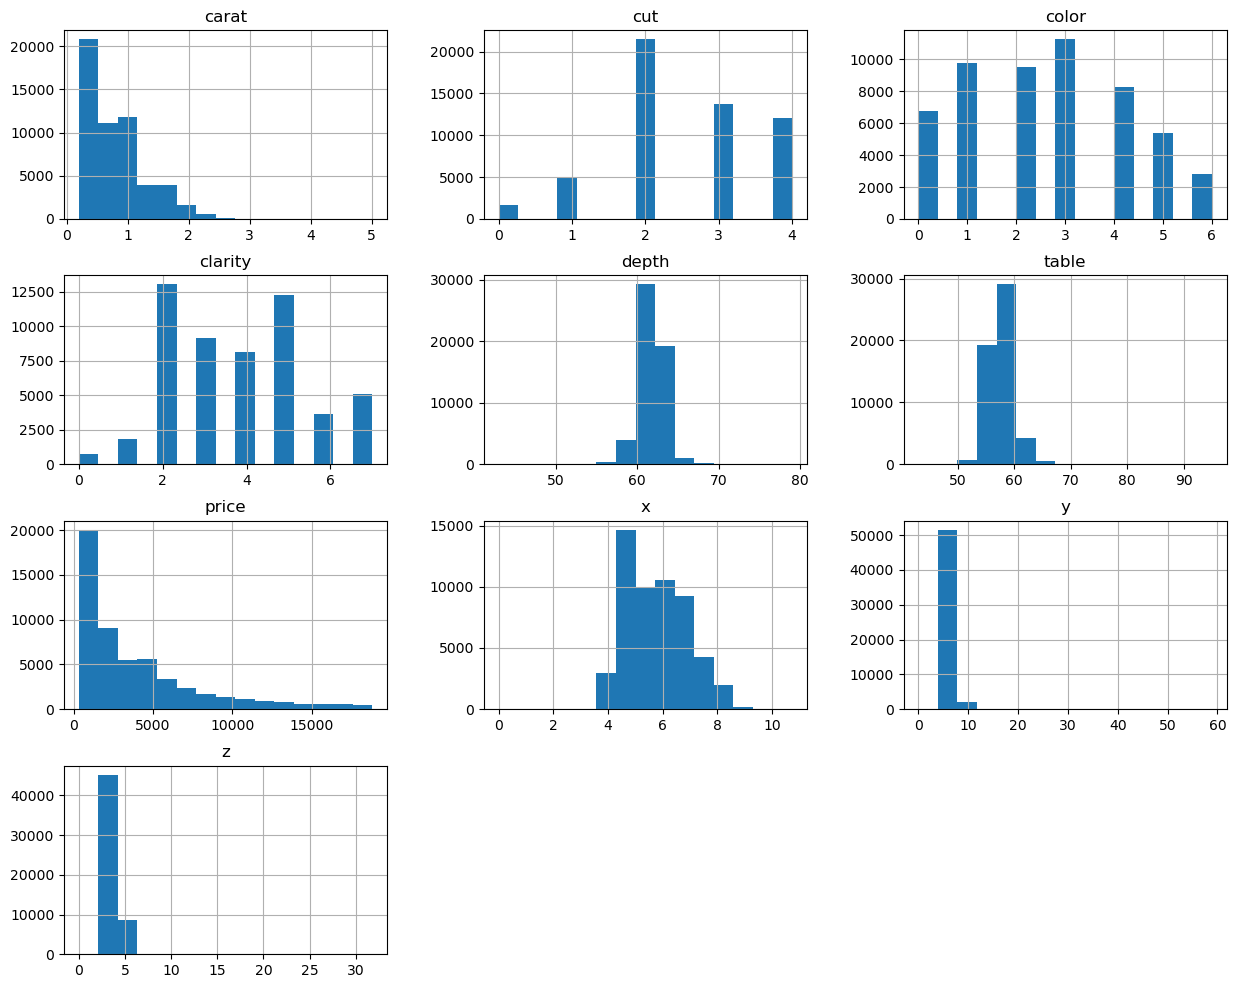

In [23]:
df.hist(figsize=(15,12),bins = 15)
plt.show()

## Correlação entre os atributos

In [24]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017785,0.291019,-0.214068,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
cut,0.017785,1.000000,0.000393,0.028141,-0.193184,0.150366,0.040196,0.022592,0.027805,0.002442
color,0.291019,0.000393,1.000000,-0.028002,0.047572,0.026102,0.171825,0.269876,0.263153,0.267825
clarity,-0.214068,0.028141,-0.028002,1.000000,-0.053165,-0.088074,-0.071218,-0.225575,-0.217459,-0.224117
depth,0.027861,-0.193184,0.047572,-0.053165,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,0.150366,0.026102,-0.088074,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,0.040196,0.171825,-0.071218,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,0.022592,0.269876,-0.225575,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,0.027805,0.263153,-0.217459,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.002442,0.267825,-0.224117,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


## Checagem das variáveis correlacionadas com o preço

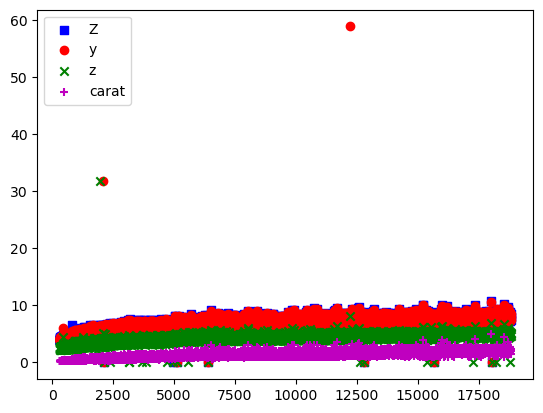

In [25]:
plt.scatter(df['price'],df['x'], c='b', marker='s', label='Z')
plt.scatter(df['price'], df['y'], c='r', marker='o', label='y')
plt.scatter(df['price'], df['z'], c='g', marker='x', label='z')
plt.scatter(df['price'], df['carat'], c='m', marker='+', label='carat')

plt.legend(loc='upper left')
plt.show()

In [26]:
dimonds_dimension = df.loc[:,'x':'z']
dimonds_dimension

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


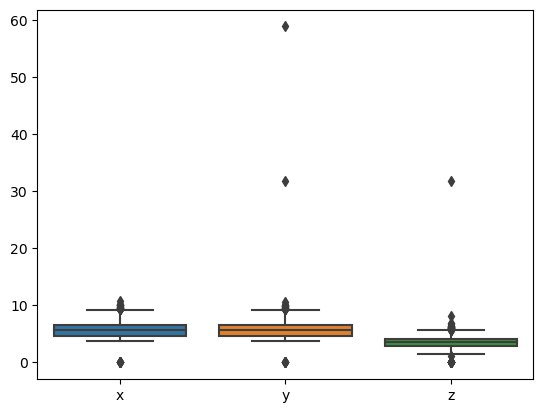

In [27]:
sns.boxplot(data = dimonds_dimension)

plt.show()

## Removendo outliers pelo z-score

In [28]:
df_without_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_without_outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


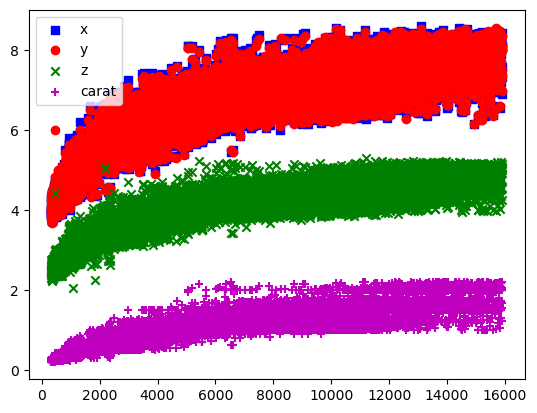

In [29]:
plt.scatter(df_without_outliers['price'],df_without_outliers['x'], c='b', marker='s', label='x')
plt.scatter(df_without_outliers['price'], df_without_outliers['y'], c='r', marker='o', label='y')
plt.scatter(df_without_outliers['price'], df_without_outliers['z'], c='g', marker='x', label='z')
plt.scatter(df_without_outliers['price'], df_without_outliers['carat'], c='m', marker='+', label='carat')
plt.legend(loc='upper left')
plt.show()

In [30]:
dimonds_dimension = df_without_outliers.loc[:,'x':'z']
dimonds_dimension

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
5,3.94,3.96,2.48
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


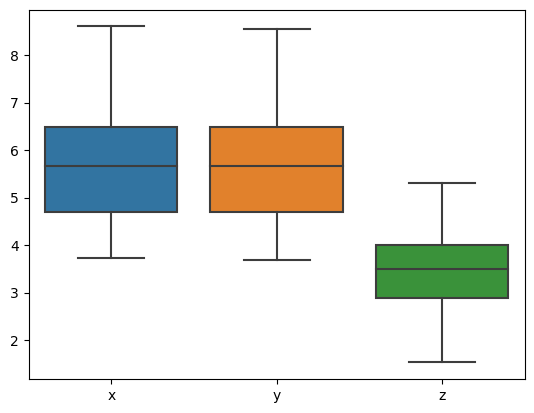

In [31]:
sns.boxplot(data = dimonds_dimension)

plt.show()

## Normalizações

Padronização (ou normalização do score Z) significa centralizar a variável em zero e padronizar a variância em 1. O procedimento consiste em subtrair a média de cada observação e depois dividir pelo desvio padrão. O resultado da padronização é que as feições serão redimensionadas para que tenham as propriedades de uma distribuição normal padrão com média arredondada para zero e desvio padrão igual a 1.<br>

O StandardScaler do sci-kit learn remove a média e dimensiona os dados para a variação da unidade.

In [32]:
scaler = StandardScaler() 
data_StandardScaler = pd.DataFrame.from_records(scaler.fit_transform(df_without_outliers))
data_StandardScaler.columns =df_without_outliers.columns

In [33]:
data_StandardScaler

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.247977,-0.596514,-0.924217,-0.500141,-0.198602,-1.128736,-0.948970,-1.616149,-1.601670,-1.631328
1,-1.295076,0.413530,-0.924217,-1.079776,-1.538712,1.728424,-0.948970,-1.672919,-1.735018,-1.815180
2,-1.106681,0.413530,1.436083,0.659130,0.510868,0.299844,-0.946642,-1.379606,-1.363549,-1.324907
3,-1.059582,-1.606557,2.026158,-0.500141,1.220338,0.299844,-0.946351,-1.247142,-1.249251,-1.141054
4,-1.224428,1.423573,2.026158,1.818402,0.826188,-0.176350,-0.946060,-1.625611,-1.620720,-1.554723
...,...,...,...,...,...,...,...,...,...,...
51451,-0.094057,-0.596514,-1.514292,-1.079776,-0.750412,-0.176350,-0.241556,0.086960,0.093753,0.008024
51452,-0.094057,-1.606557,-1.514292,-1.079776,1.062678,-1.128736,-0.241556,0.030190,0.084229,0.176556
51453,-0.141155,1.423573,-1.514292,-1.079776,0.826188,1.252231,-0.241556,0.001805,0.017555,0.099951
51454,0.235635,0.413530,0.846008,-0.500141,-0.592752,0.299844,-0.241556,0.465429,0.436648,0.375730


In [34]:
print(data_StandardScaler.mean(axis=0))
print(data_StandardScaler.std(axis=0))

carat     -1.811707e-16
cut        1.866942e-16
color     -1.005277e-16
clarity    4.418798e-18
depth     -1.956423e-15
table      2.852887e-16
price      2.209399e-17
x         -3.457710e-16
y          3.606844e-16
z          6.578486e-16
dtype: float64
carat      1.00001
cut        1.00001
color      1.00001
clarity    1.00001
depth      1.00001
table      1.00001
price      1.00001
x          1.00001
y          1.00001
z          1.00001
dtype: float64


Como esperado, a média de cada variável está agora em torno de zero e o desvio padrão é definido como 1. Assim, todos os valores das variáveis estão dentro do mesmo intervalo.

In [35]:
print('Min values: ', data_StandardScaler.min(axis=0))
print('Max values: ', data_StandardScaler.max(axis=0))

Min values:  carat     -1.318625
cut       -2.616600
color     -1.514292
clarity   -2.239047
depth     -3.351802
table     -3.033510
price     -0.948970
x         -1.824307
y         -1.887416
z         -3.010222
dtype: float64
Max values:  carat      3.414803
cut        1.423573
color      2.026158
clarity    1.818402
depth      3.348747
table      3.157004
price      3.582147
x          2.783549
y          2.751187
z          2.765813
dtype: float64


No entanto, os valores mínimos e máximos variam de acordo com o quão espalhada a variável estava, inicialmente, e são altamente influenciados pela presença de outliers.

In [36]:
from sklearn.preprocessing import MinMaxScaler

Nessa abordagem, os dados são dimensionados para um intervalo fixo — geralmente de 0 a 1.<br>
Em contraste com a padronização, o custo de ter esse intervalo limitado é que acabaremos com desvios padrão menores, o que pode suprimir o efeito dos valores discrepantes. Assim MinMax Scalar é sensível a outliers.<br>
Uma escala Min-Max é normalmente feita através da seguinte equação:

\begin{equation*}
Xnorm = \frac{X-Xmin}{(Xmax-Xmin)}
\end{equation*}

In [37]:
scaler = MinMaxScaler() 
data_MinMaxScaler = pd.DataFrame.from_records(scaler.fit_transform(df_without_outliers))
data_MinMaxScaler.columns =df_without_outliers.columns

In [38]:
data_MinMaxScaler

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.014925,0.50,0.166667,0.428571,0.470588,0.307692,0.000000,0.045175,0.061602,0.238727
1,0.004975,0.75,0.166667,0.285714,0.270588,0.769231,0.000000,0.032854,0.032854,0.206897
2,0.044776,0.75,0.833333,0.714286,0.576471,0.538462,0.000514,0.096509,0.112936,0.291777
3,0.054726,0.25,1.000000,0.428571,0.682353,0.538462,0.000578,0.125257,0.137577,0.323607
4,0.019900,1.00,1.000000,1.000000,0.623529,0.461538,0.000642,0.043121,0.057495,0.251989
...,...,...,...,...,...,...,...,...,...,...
51451,0.258706,0.50,0.000000,0.285714,0.388235,0.461538,0.156124,0.414784,0.427105,0.522546
51452,0.258706,0.25,0.000000,0.285714,0.658824,0.307692,0.156124,0.402464,0.425051,0.551724
51453,0.248756,1.00,0.000000,0.285714,0.623529,0.692308,0.156124,0.396304,0.410678,0.538462
51454,0.328358,0.75,0.666667,0.428571,0.411765,0.538462,0.156124,0.496920,0.501027,0.586207


In [39]:
print('means: ', data_MinMaxScaler.mean(axis=0))
print('std: ', data_MinMaxScaler.std(axis=0))

means:  carat      0.278577
cut        0.647646
color      0.427712
clarity    0.551836
depth      0.500228
table      0.490026
price      0.209434
x          0.395912
y          0.406893
z          0.521157
dtype: float64
std:  carat      0.211265
cut        0.247517
color      0.282453
clarity    0.246463
depth      0.149243
table      0.161539
price      0.220698
x          0.217023
y          0.215584
z          0.173131
dtype: float64


Após MinMaxScaling, as distribuições não são centradas em zero e o desvio padrão não é 1 como na outra normalização.

In [40]:
print('Min: ', data_MinMaxScaler.min(axis=0))
print('Max: ', data_MinMaxScaler.max(axis=0))

Min:  carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64
Max:  carat      1.0
cut        1.0
color      1.0
clarity    1.0
depth      1.0
table      1.0
price      1.0
x          1.0
y          1.0
z          1.0
dtype: float64


Mas os valores mínimos e máximos são padronizados entre as variáveis, diferente do que ocorre com a padronização.

In [41]:
from sklearn.preprocessing import RobustScaler

O escalonamento usando mediana e quartis consiste em subtrair a mediana de todas as observações e depois dividir pela diferença interquartil. Ele dimensiona recursos usando estatísticas robustas para valores discrepantes.<br>
A diferença interquartil é a diferença entre o 75º e o 25º quantil:

\begin{equation*}
IQR = \text{75th quantile} — \text{25th quantile}
\end{equation*}


A equeção que calcula os valores escalados é:

\begin{equation*}
Xscaled = \frac{X-Xmedian}{(IQR)}
\end{equation*}

In [42]:
scaler = RobustScaler() 
data_RobustScaler = pd.DataFrame.from_records(scaler.fit_transform(df_without_outliers))
data_RobustScaler.columns =df_without_outliers.columns
data_RobustScaler

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-0.746032,0.0,-0.666667,-0.333333,-0.214286,-0.666667,-0.480233,-0.950000,-0.938547,-0.955357
1,-0.777778,1.0,-0.666667,-0.666667,-1.428571,1.333333,-0.480233,-0.983333,-1.016760,-1.062500
2,-0.650794,1.0,0.666667,0.333333,0.428571,0.333333,-0.478293,-0.811111,-0.798883,-0.776786
3,-0.619048,-1.0,1.000000,-0.333333,1.071429,0.333333,-0.478050,-0.733333,-0.731844,-0.669643
4,-0.730159,2.0,1.000000,1.000000,0.714286,0.000000,-0.477807,-0.955556,-0.949721,-0.910714
...,...,...,...,...,...,...,...,...,...,...
51451,0.031746,0.0,-1.000000,-0.666667,-0.714286,0.000000,0.109386,0.050000,0.055866,0.000000
51452,0.031746,-1.0,-1.000000,-0.666667,0.928571,-0.666667,0.109386,0.016667,0.050279,0.098214
51453,0.000000,2.0,-1.000000,-0.666667,0.714286,1.000000,0.109386,0.000000,0.011173,0.053571
51454,0.253968,1.0,0.333333,-0.333333,-0.571429,0.333333,0.109386,0.272222,0.256983,0.214286


In [43]:
print('means: ', data_RobustScaler.mean(axis=0))
print('std: ', data_RobustScaler.std(axis=0))

means:  carat      0.095143
cut        0.590582
color     -0.144577
clarity   -0.045715
depth     -0.034330
table      0.123444
price      0.310720
x         -0.001060
y          0.000877
z         -0.004676
dtype: float64
std:  carat      0.674037
cut        0.990066
color      0.564905
clarity    0.575080
depth      0.906118
table      0.700002
price      0.833493
x          0.587167
y          0.586534
z          0.582771
dtype: float64


Como você pode ver, as distribuições não são centralizadas em zero e o desvio padrão não é 1 como a normalização da Padronização.

In [44]:
print('Min: ', data_RobustScaler.min(axis=0))
print('Max: ', data_RobustScaler.max(axis=0))

Min:  carat     -0.793651
cut       -2.000000
color     -1.000000
clarity   -1.333333
depth     -3.071429
table     -2.000000
price     -0.480233
x         -1.072222
y         -1.106145
z         -1.758929
dtype: float64
Max:  carat      2.396825
cut        2.000000
color      1.000000
clarity    1.000000
depth      3.000000
table      2.333333
price      3.296386
x          1.633333
y          1.614525
z          1.607143
dtype: float64


Os valores mínimo e máximo também não são definidos para determinados limites superiores e inferiores, como no MinMaxScaler.

### Visualização dos boxplots para ve a diferença entre as normalizações

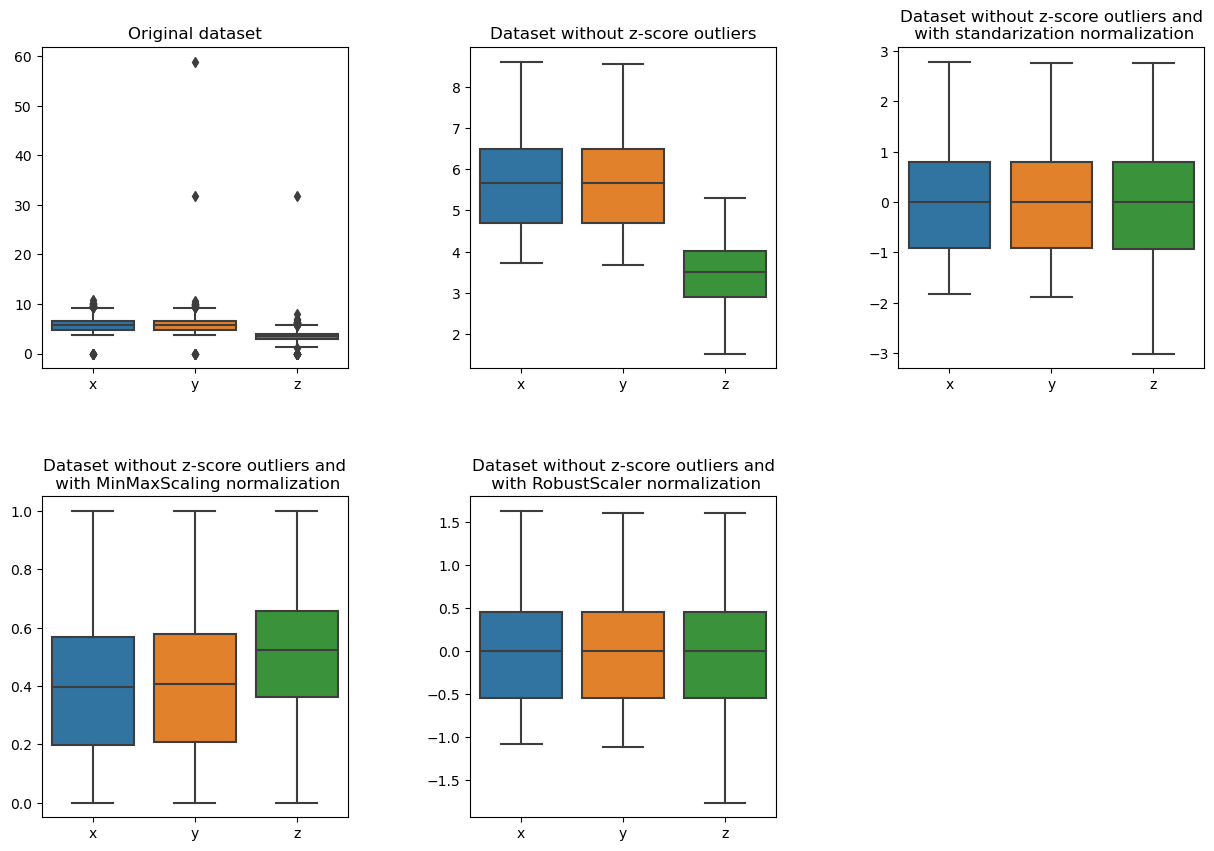

In [45]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plot1 = plt.subplot(2, 3, 1)
dimonds_depth = df.loc[:,'x':'z']
sns.boxplot(data = dimonds_depth).set_title('Original dataset')

plot2 = plt.subplot(2, 3, 2)
dimonds_depth = df_without_outliers.loc[:,'x':'z']
sns.boxplot(data = dimonds_depth).set_title('Dataset without z-score outliers')

plot3 = plt.subplot(2, 3, 3)
dimonds_depth = data_StandardScaler.loc[:,'x':'z']
sns.boxplot(data = dimonds_depth).set_title('Dataset without z-score outliers and\n with standarization normalization')

plot4 = plt.subplot(2, 3, 4)
dimonds_depth = data_MinMaxScaler.loc[:,'x':'z']
sns.boxplot(data = dimonds_depth).set_title('Dataset without z-score outliers and\n with MinMaxScaling normalization')

plot5 = plt.subplot(2, 3, 5)
dimonds_depth = data_RobustScaler.loc[:,'x':'z']
sns.boxplot(data = dimonds_depth).set_title('Dataset without z-score outliers and\n with RobustScaler normalization')

plt.show()

### Boxplots para visualizar a diferença entre as normalizações sem remoção de outliers pelo z-score 

In [46]:
scaler = StandardScaler() 
data_StandardScaler = pd.DataFrame.from_records(scaler.fit_transform(df))
data_StandardScaler.columns =df_without_outliers.columns

In [47]:
scaler = MinMaxScaler() 
data_MinMaxScaler = pd.DataFrame.from_records(scaler.fit_transform(df))
data_MinMaxScaler.columns =df_without_outliers.columns

In [48]:
scaler = RobustScaler() 
data_RobustScaler = pd.DataFrame.from_records(scaler.fit_transform(df))
data_RobustScaler.columns =df_without_outliers.columns

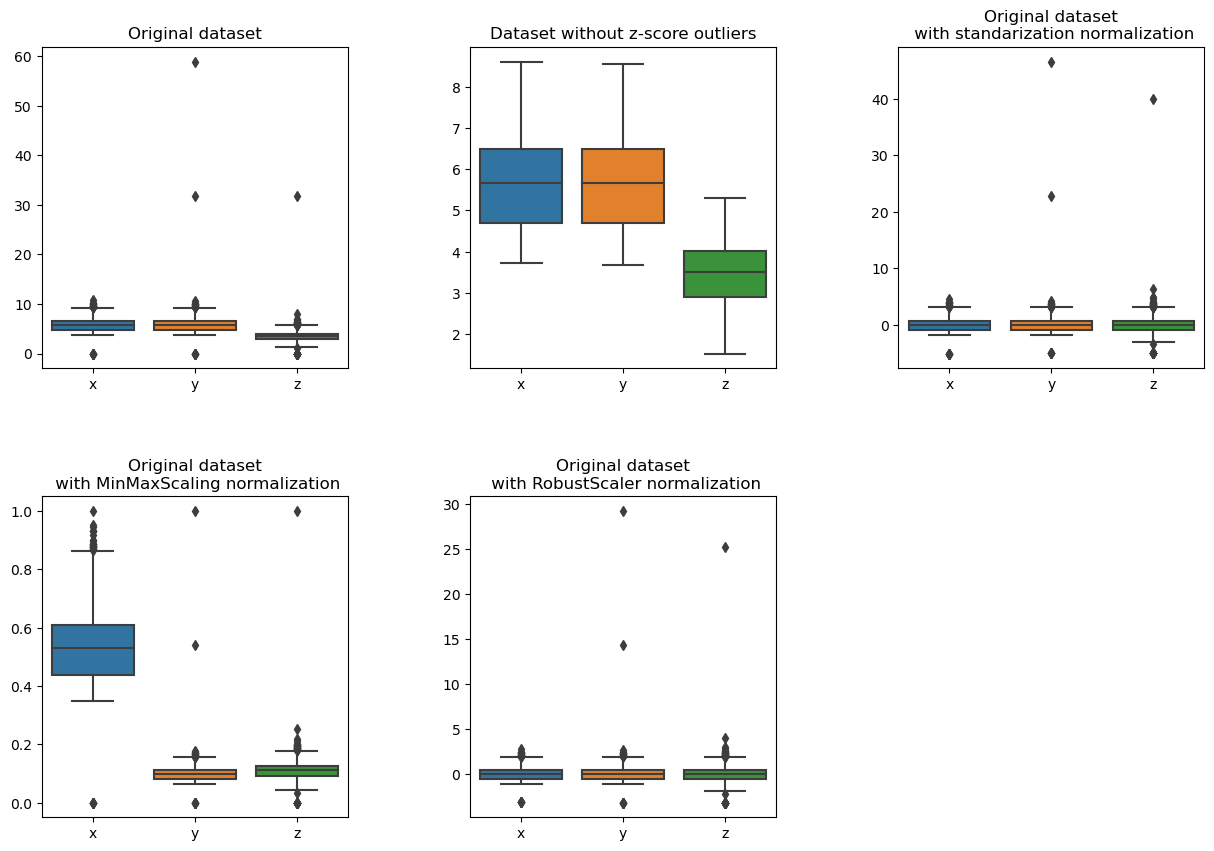

In [49]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plot1 = plt.subplot(2, 3, 1)
dimonds_depth = df.loc[:,'x':'z']
sns.boxplot(data = dimonds_depth).set_title('Original dataset')

plot2 = plt.subplot(2, 3, 2)
dimonds_depth = df_without_outliers.loc[:,'x':'z']
sns.boxplot(data = dimonds_depth).set_title('Dataset without z-score outliers')

plot3 = plt.subplot(2, 3, 3)
dimonds_depth = data_StandardScaler.loc[:,'x':'z']
sns.boxplot(data = dimonds_depth).set_title('Original dataset\n with standarization normalization')

plot4 = plt.subplot(2, 3, 4)
dimonds_depth = data_MinMaxScaler.loc[:,'x':'z']
sns.boxplot(data = dimonds_depth).set_title('Original dataset\n with MinMaxScaling normalization')

plot5 = plt.subplot(2, 3, 5)
dimonds_depth = data_RobustScaler.loc[:,'x':'z']
sns.boxplot(data = dimonds_depth).set_title('Original dataset\n with RobustScaler normalization')

plt.show()

# Ajustes finais para execução do regressor

### Separando o alvo (preço) dos atributos

In [50]:
target = pd.DataFrame(df, columns=["price"])

In [51]:
X = df.drop(df.columns[6], axis=1)
y = target

### Separando aleatoriamente a base de treino (80% da base original) e a base de teste (20% da base original)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
def results_regression(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print(f"mse: {mse}")
    rmse = math.sqrt(mse)
    print(f"rmse: {rmse}")
    mae = mean_absolute_error(y_test,y_pred)
    print(f"mae: {mae}")
    mape = mean_absolute_percentage_error(y_test,y_pred)
    print(f"mape: {mape}")
    r2 = r2_score(y_test,y_pred)
    print(f"r2_score {r2}")


### Regressão Linear

In [54]:
def computeLinearRegression(X_train, X_test, y_train, y_test):
    regressao_linear = LinearRegression()
    regressao_linear.fit(X_train,y_train)
    y_pred = regressao_linear.predict(X_test)

    return results_regression(y_test,y_pred)

In [55]:
computeLinearRegression(X_train, X_test, y_train, y_test)

mse: 1873968.860533088
rmse: 1368.9298230855693
mae: 879.5494551718106
mape: 0.3877366297170783
r2_score 0.8827630924488556


### Árvore de decisão

In [56]:
def computeRegressionDecisionTree(X_train, X_test, y_train, y_test,printResults):
    arvore_regressao = tree.DecisionTreeRegressor()
    arvore_regressao.fit(X_train,y_train)
    y_pred = arvore_regressao.predict(X_test)
        
    return results_regression(y_test, y_pred)

In [57]:
computeRegressionDecisionTree(X_train, X_test, y_train, y_test, True)

mse: 550769.6150199833
rmse: 742.1385416618539
mae: 363.1238962728878
mape: 0.08537567335598789
r2_score 0.965543436821192


### KNN para regressão

In [58]:
def knn_regression(X_train, X_test, y_train, y_test, n_neighbors, distance_metric, optimizer):
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = n_neighbors, metric = distance_metric, algorithm=optimizer)
    model_KNN = knn.fit(X_train, y_train)
    y_pred = model_KNN.predict(X_test)
    
    return results_regression(y_test, y_pred)

In [59]:
knn_regression(X_train, X_test, y_train, y_test, 3,'euclidean', 'auto')

mse: 876573.1413493614
rmse: 936.2548485051286
mae: 488.88143259906434
mape: 0.13532116157111018
r2_score 0.9451609220950676
